In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)

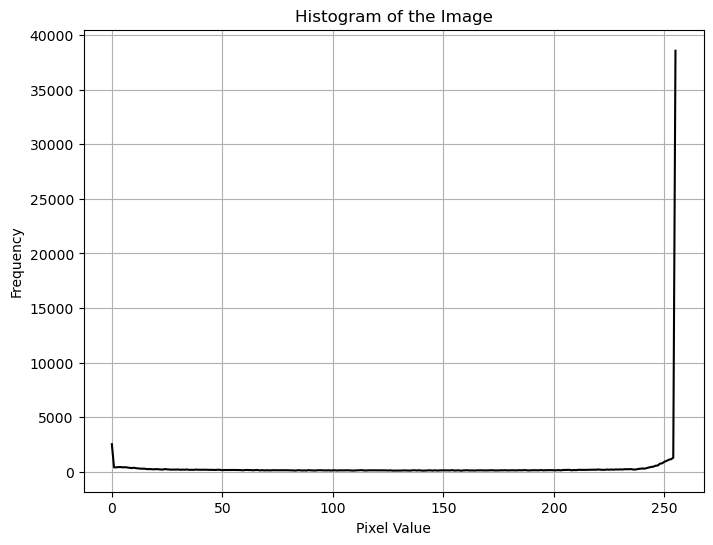

In [29]:

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.plot(hist, color='black')
    plt.title('Histogram of the Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

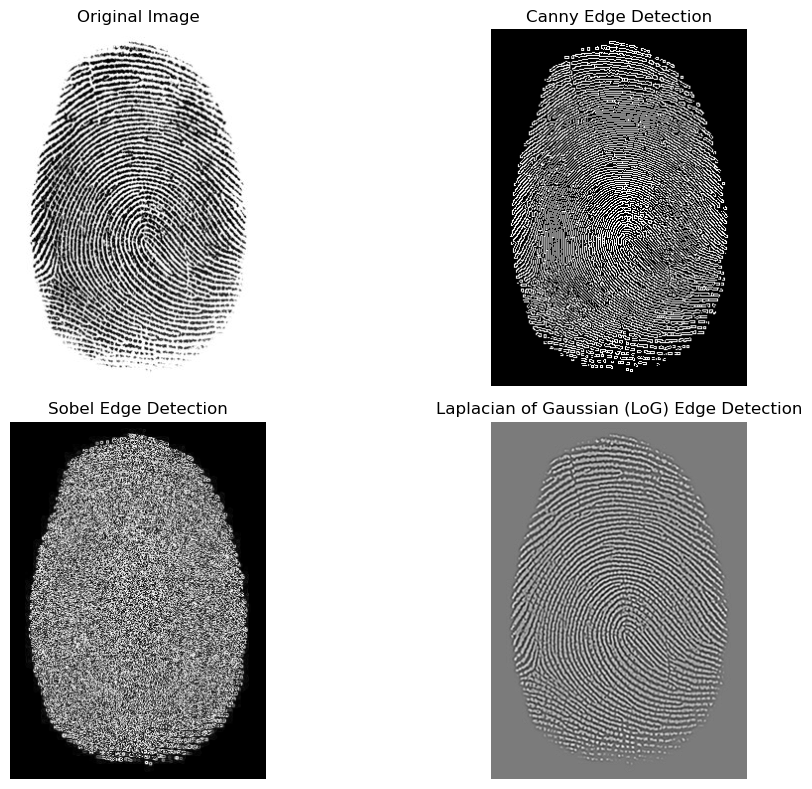

In [30]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Edge detection using Canny
    canny_edges = cv2.Canny(image, 100, 200)

    # Edge detection using Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

    # Edge detection using Laplacian of Gaussian (LoG)
    log_edges = cv2.Laplacian(cv2.GaussianBlur(image, (3, 3), 0), cv2.CV_64F)

    # Display the original and edge-detected images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(log_edges, cmap='gray')
    plt.title('Laplacian of Gaussian (LoG) Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


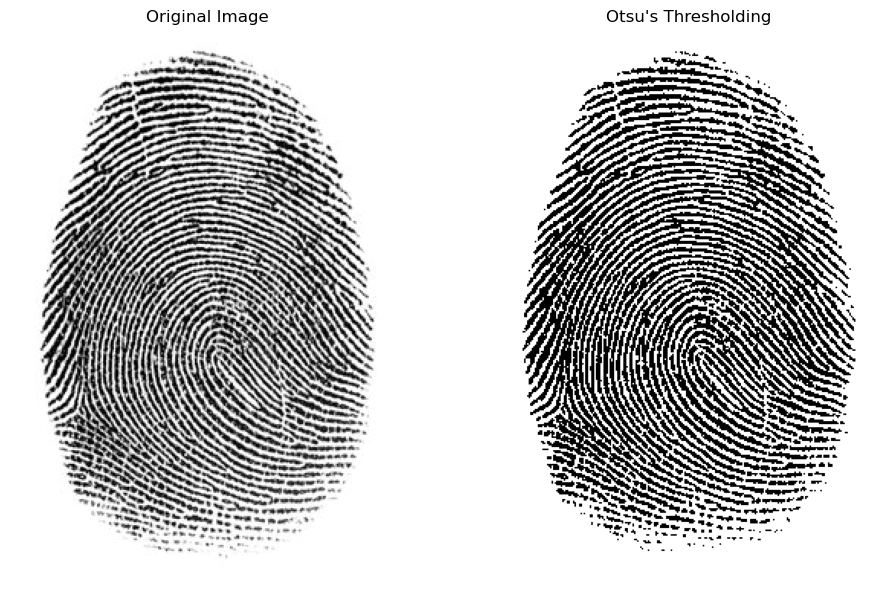

In [34]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Calculate the histogram of the image
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()

    # Variables to store optimal threshold and maximum variance
    max_variance = 0
    optimal_threshold = 0

    # Calculate total number of pixels in the image
    total_pixels = image.shape[0] * image.shape[1]

    # Compute between-class variance for each intensity level as potential threshold
    for threshold in range(1, 256):
        # Class probabilities
        class1_prob = np.sum(hist_norm[:threshold])
        class2_prob = 1 - class1_prob

        # Class intensities
        class1_intensity = np.sum(np.arange(threshold) * hist_norm[:threshold]) / class1_prob
        class2_intensity = np.sum(np.arange(threshold, 256) * hist_norm[threshold:]) / class2_prob

        # Calculate between-class variance
        between_class_variance = class1_prob * class2_prob * (class1_intensity - class2_intensity) ** 2

        # Update optimal threshold if variance is higher
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = threshold

    # Apply the optimal threshold
    _, otsu_threshold = cv2.threshold(image, optimal_threshold, 255, cv2.THRESH_BINARY)

    # Display the original and Otsu thresholded images using Matplotlib
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


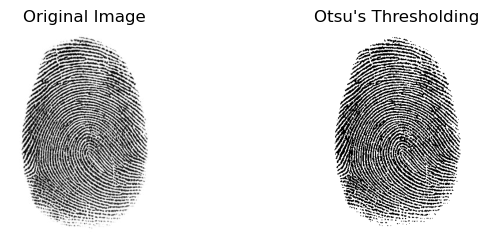

In [32]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Otsu's thresholding for image segmentation
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
